In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
# Read the CSV file into pandas DF

fed_data = pd.read_csv('fed_data.csv')
fed_data.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [34]:
fed_data = fed_data.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target'])
fed_data = fed_data.dropna()
fed_data

,Year,Month,Day,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
42,1958,1,1,2.72,-10.0,5.8,3.2
45,1958,4,1,1.26,2.6,7.4,2.4
48,1958,7,1,0.68,9.6,7.5,2.4
51,1958,10,1,1.80,9.7,6.7,1.7
54,1959,1,1,2.48,7.7,6.0,1.7
...,...,...,...,...,...,...,...
883,2015,10,1,0.12,0.9,5.0,1.9
887,2016,1,1,0.34,0.8,4.9,2.2
890,2016,4,1,0.37,1.4,5.0,2.1
893,2016,7,1,0.39,3.5,4.9,2.2


In [43]:
# Assign X (data) and y (target)

y = fed_data['Unemployment Rate'].values.reshape(-1, 1)
X = fed_data['Effective Federal Funds Rate'].values.reshape(-1, 1)
print(X.shape, y.shape)

(236, 1) (236, 1)


In [44]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Create a StandardScater model and fit it to the training data

X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

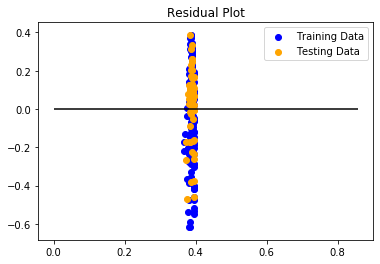

In [45]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03659812823021162, R2: -0.024924250759184696
